# Lista 00 - Primeiros passos com programação, plots e séries de Taylor

Aluno: Pedro Henrique Cardoso Paulo

Professor: Ivan Menezes

Discuplina: MEC2403 - Otimização: Algoritmos e Aplicações na Engenharia (2023.1)

## Objetivos

O objetivo deste notebook é executar programaticamente as tarefas 3 e 4 da Lista 0 da disciplina de otimização. As questões teóricas 1 e 2 não estarão contempladas neste notebook por não exigirem o uso de linguagem de programação.

## Pacotes básicos

In [20]:
#Programação vetorizada
import numpy as np

#Plots
import matplotlib.pyplot as plt

%matplotlib widget

## Questão 03

### Enunciado:

Determinar a expansão em série de Taylor, em torno do ponto $x = 1$, da função $f(x) = e^{2x}$. Em seguida, usando o MATLAB ou Python, plotar os gráficos da função $f$ e de suas respectivas aproximações (polinômios) de ordens 0, 1, 2 e 3.

### Solução:

Para a função em questão, suas derivadas são calculadas de acordo com a regra de derivação da função exponencial. Assim temos que a derivada n-ésima da função $f(x)$ criada é dada por:

\begin{equation}
    \frac{d^nf}{dx^n} = 2^n e^{2x}
\end{equation}

Pela definição da série de Taylor, para uma expansão ao redor de $x = 1$, temos que a expansão da função seria:

\begin{equation}
    f(x) \cong \sum^{\infty}_{n=0} 2^n e^2 (x-1)^n
\end{equation}

O primeiro passo é implementar em Python as funções `f` e `taylor_f` que representam, respectivamente, a função f definida na questão e seu polinômio de Taylor de ordem arbitrária. As funççoes são implementadas com funções do módulo `numpy` de modo a garantir a vetorização:

In [21]:
def f(x):

    return np.exp(2*x)

def taylor_f(x, order):

    f_approx = 0
    for n in range(order+1):
        f_approx += (x-1)**n * (2**n) * np.exp(2)
    return f_approx

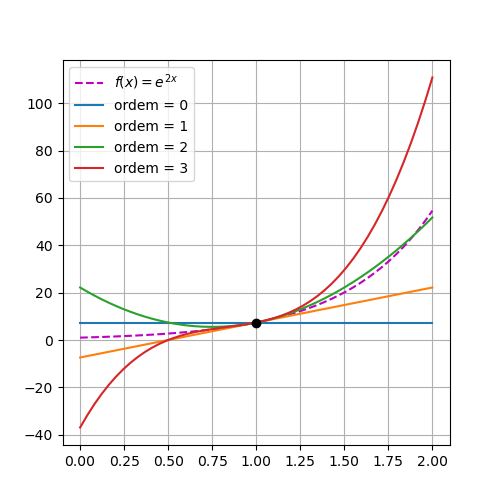

In [22]:
orders = [0, 1, 2, 3]
points = 50
x_values = np.linspace(0, 2, points)
fig, ax = plt.subplots(1,1, figsize=(5, 5))
f_real = f(x_values)
ax.plot(x_values, f_real, 'm--', label='$f(x) = e^{2x}$')
for n in orders:
    f_approx = taylor_f(x_values, n)
    ax.plot(x_values, f_approx, label=f'ordem = {n}')

ax.plot(1, f(1), 'ko')
ax.legend()
ax.grid()
fig.savefig('images/q3_1.pdf')

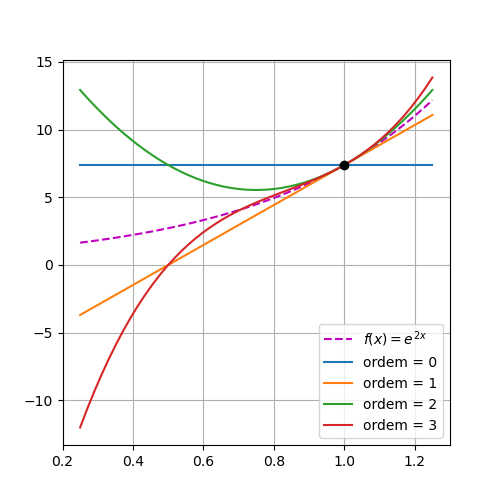

In [23]:
orders = [0, 1, 2, 3]
points = 50
x_values = np.linspace(0.25, 1.25, points)
fig, ax = plt.subplots(1,1, figsize=(5, 5))
f_real = f(x_values)
ax.plot(x_values, f_real, 'm--', label='$f(x) = e^{2x}$')
for n in orders:
    f_approx = taylor_f(x_values, n)
    ax.plot(x_values, f_approx, label=f'ordem = {n}')

ax.plot(1, f(1), 'ko')
ax.legend()
ax.grid()
fig.savefig('images/q3_2.pdf')

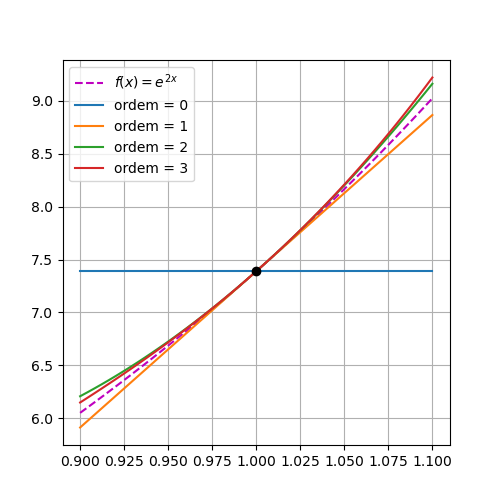

In [24]:
orders = range(0, 4)
points = 50
x_values = np.linspace(0.9, 1.1, points)
fig, ax = plt.subplots(1,1, figsize=(5, 5))
f_real = f(x_values)
ax.plot(x_values, f_real, 'm--', label='$f(x) = e^{2x}$')
for n in orders:
    f_approx = taylor_f(x_values, n)
    ax.plot(x_values, f_approx, label=f'ordem = {n}')

ax.plot(1, f(1), 'ko')
ax.legend()
ax.grid()
fig.savefig('images/q3_3.pdf')

## Questão 04

### Enunciado:

Seja a função $f(x_1, x_2)$ dada por:

\begin{equation}
    f(x_1, x_2) = x_1^3 + 2x_1 x_2^2 - x_2^3 - 20x_1
\end{equation}

Desenhar o gráfico da curva contida em um plano Cartesiano, cujo eixo das abscissas corresponde à reta que passa pelos pontos $P_1 = (-0.7, 1.6)$ e $P_2 = (3.7,-0.4)$, a origem desse eixo é no ponto $P_1$ e o eixo das ordenadas corresponde aos valores da função $f$. Utilizar o MATLAB ou Python e considerar apenas o trecho entre os pontos $P_1$ e $P_2$.

### Solução:

Tal como na Questão 3, começamos definindo a função f. O único argumento que essa função espera receber é um ponto P, vetor 1D com duas dimensões correspondentes às coordenadas $x_1$ e $x_2$:

In [25]:
def f2(P):
    return P[0]**3 + 2*P[0]*(P[1]**2) - P[1]**3 - 20*P[0]

In [26]:
P1 = np.array([-0.7, 1.6])
P2 = np.array([3.7, -0.4])
v = P2 - P1
v_norm = np.linalg.norm(v)
v_hat  = v / v_norm


In [ ]:
points = 50
x_values = np.linspace(0, v_norm, points)
y_values = f2(P1.reshape(-1,1) + v_hat.reshape(-1,1)*x_values.reshape(1,-1))
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.plot(x_values, y_values, 'm--', label='Função projetada')
ax.hlines(0, 0, v_norm, 'k', linewidth=1.0)
ax.set_xlim(0, v_norm)
ax.plot(0, 0, 'ko')
ax.text(0.05, -2.5, '$P_1$')
ax.plot(v_norm, 0, 'ko')
ax.text(4.6, -2.5, '$P_2$')
ax.legend()
ax.grid()
fig.savefig('images/q4_1.pdf')

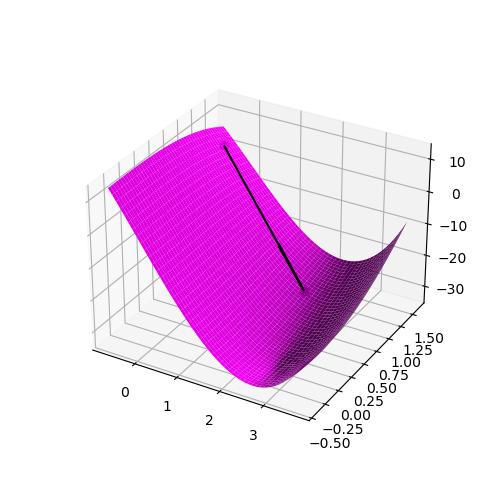

In [ ]:
points = 50
x_values = np.linspace(P1[0], P2[0], points)
y_values = np.linspace(P1[1], P2[1], points)
X, Y = np.meshgrid(x_values, y_values)
fig = plt.figure(figsize=(5, 5))
Z = f2(np.vstack([X.ravel(), Y.ravel()])).reshape(50,-1)
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(X, Y, Z, color='magenta')
ax.plot(P1[0], P1[1], 0, 'ko')
ax.plot(P2[0], P2[1], 0, 'ko')
ax.quiver(*P1, 0, *v, 0, color='black')

